In [1]:
# Add the relevant scripts from LArMachineLearningData
# Nice the process so it can run with lots of cores on low priority
import os
os.nice(20)

# Add local paths
import sys
hnlDIR = os.environ['_']
sys.path.append('../pyscript')

# From pyscript Library
from Plotting import *
from Dictionary import *
from HelperFunctions import *
from CutFunctions import *

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

<h1>Configuration Stuff Here</h1>

In [2]:
ifTune = True
ifSave = True
savePath = "../plot_files/28Feb2024_m200/"

In [3]:
ifStrict = False

In [4]:
TuneCut = {}

if ifStrict:   
    TuneCut = {
    'crumbs': 0.14
    , 'Opt0Score': 1550
    ,'Opt0FracMore': 0.16
    #, 'Opt0FracLess': 0.92
    , 'Muon' : 0.02
    , 'Proton' : 0.02
    , 'Pion' : 0.02
    , 'OneShowerTheta': 6.6
    , 'TwoShowerTheta': 7.6
    }
    
else:
    TuneCut = {
    'crumbs': 0.14
    , 'Opt0Score': 1550
    , 'Opt0FracMore': 0.12
    #, 'Opt0FracLess': 0.92
    , 'Muon' : 0.04
    , 'Proton' : 1 #0.88
    , 'Pion' : 0.98
    , 'OneShowerTheta': 24.4
    , 'TwoShowerTheta': 24.6
    }
    

<h1> Read in PKL Dataframe </h1>

<h3> HNL </h3>

In [5]:
df_hnl = pd.DataFrame()

for i in range(0, 5):
    hnl_path = "../pkl_files/v2/hnl_m200_50k_v2_slc_{}.pkl".format(i)
    print(hnl_path)
    
    file = open(hnl_path, 'rb')
    df = pickle.load(file)
    
    df_hnl = pd.concat((df_hnl, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_hnl = pd.DataFrame()

for i in range(0, 5):
    hnl_path = "../pkl_files/v2/hnl_m200_50k_v2_subrun_{}.pkl".format(i)
    print(hnl_path)
    
    file = open(hnl_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_hnl = pd.concat((dfsubrun_hnl, df), ignore_index=True)
    file.close()

../pkl_files/v2/hnl_m200_50k_v2_slc_0.pkl
../pkl_files/v2/hnl_m200_50k_v2_slc_1.pkl
../pkl_files/v2/hnl_m200_50k_v2_slc_2.pkl
../pkl_files/v2/hnl_m200_50k_v2_slc_3.pkl
../pkl_files/v2/hnl_m200_50k_v2_slc_4.pkl
../pkl_files/v2/hnl_m200_50k_v2_subrun_0.pkl
../pkl_files/v2/hnl_m200_50k_v2_subrun_1.pkl
../pkl_files/v2/hnl_m200_50k_v2_subrun_2.pkl
../pkl_files/v2/hnl_m200_50k_v2_subrun_3.pkl
../pkl_files/v2/hnl_m200_50k_v2_subrun_4.pkl


<h3> TPC Neutrino </h3>

In [6]:
df_nu = pd.DataFrame()

for i in range(0, 10):
    nu_path = "../pkl_files/v2/nu_rockbox_100k_v2_slc_{}.pkl".format(i)
    print(nu_path)
    
    file = open(nu_path, 'rb')
    df = pickle.load(file)
    
    df_nu = pd.concat((df_nu, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_nu = pd.DataFrame()

for i in range(0, 10):
    nu_path = "../pkl_files/v2/nu_rockbox_100k_v2_subrun_{}.pkl".format(i)
    print(nu_path)
    
    file = open(nu_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_nu = pd.concat((dfsubrun_nu, df), ignore_index=True)
    file.close()

../pkl_files/v2/nu_rockbox_100k_v2_slc_0.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_1.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_2.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_3.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_4.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_5.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_6.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_7.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_8.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_9.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_0.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_1.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_2.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_3.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_4.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_5.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_6.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_7.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_8.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_9.pkl


<h3> Intime Cosmics </h3>

In [7]:
df_cos = pd.DataFrame()

for i in range(0, 5):
    cos_path = "../pkl_files/v2/intime_cosmics_50k_v2_slc_{}.pkl".format(i)
    print(cos_path)
    
    file = open(cos_path, 'rb')
    df = pickle.load(file)
    
    df_cos = pd.concat((df_cos, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_cos = pd.DataFrame()

for i in range(0, 5):
    cos_path = "../pkl_files/v2/intime_cosmics_50k_v2_subrun_{}.pkl".format(i)
    print(cos_path)
    
    file = open(cos_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_cos = pd.concat((dfsubrun_cos, df), ignore_index=True)
    file.close()

../pkl_files/v2/intime_cosmics_50k_v2_slc_0.pkl
../pkl_files/v2/intime_cosmics_50k_v2_slc_1.pkl
../pkl_files/v2/intime_cosmics_50k_v2_slc_2.pkl
../pkl_files/v2/intime_cosmics_50k_v2_slc_3.pkl
../pkl_files/v2/intime_cosmics_50k_v2_slc_4.pkl
../pkl_files/v2/intime_cosmics_50k_v2_subrun_0.pkl
../pkl_files/v2/intime_cosmics_50k_v2_subrun_1.pkl
../pkl_files/v2/intime_cosmics_50k_v2_subrun_2.pkl
../pkl_files/v2/intime_cosmics_50k_v2_subrun_3.pkl
../pkl_files/v2/intime_cosmics_50k_v2_subrun_4.pkl


<h1>Some Scaling Voodoo</h1>

<h3>HNL</h3>

In [8]:
true_signals = 7005 + 6986 + 6923 + 7010 + 6909
true_nonfv_signals = 3045 + 3014 + 3077 + 2990 + 2991
total_true_signals = 10050 + 10000 + 10000 + 10000 + 9900
start_signals = 6668 + 6680 + 6626 + 6701 + 6591
start_nonfv_signals = 2568 + 2530 + 2569 + 2515 + 2502
total_start_signals = 9236 + 9210 + 9195 + 9216 + 9093

In [9]:
#Sanity Check: ifScale == 1 i.e. Umu = 1e-7 and 3 years POT
#true counts ~1.5k
#start counts ~1.4k
scale_pot_hnl, hnl_spill = calc_scaling_pot(dfsubrun_hnl, df_hnl, ifScale = 1)

true_signals = true_signals * scale_pot_hnl
true_nonfv_signals = true_nonfv_signals * scale_pot_hnl
total_true_signals = total_true_signals * scale_pot_hnl
start_signals = start_signals * scale_pot_hnl
start_nonfv_signals = start_nonfv_signals * scale_pot_hnl
total_start_signals = total_start_signals * scale_pot_hnl

true_counts = total_true_signals
start_counts = total_start_signals
print("true counts = " + str(true_counts))
print("start counts = " + str(start_counts))

-----------------------------------------------
sample pot = 3.3482113319242767e+22
sample spill = 49950
target spill = 1491.8413161003443
scale pot factor = 0.02986669301502191
-----------------------------------------------
true counts = 1491.8413161003443
start counts = 1372.3745440402568


In [10]:
simU = 1e-7 #already squared
scaleHNLPlot = 80

In [11]:
plotU = getUfromScaleFactor(simU, scaleHNLPlot)
true_counts = true_counts * scaleHNLPlot
start_counts =  start_counts * scaleHNLPlot

print("Scale Umu by " + str(scaleHNLPlot))
print("Scaled Umu = " + str(plotU))
print("Scaled true counts = " + str(true_counts))
print("Scaled start counts = " + str(start_counts))

Scale Umu by 80
Scaled Umu = 8.944271909999158e-07
Scaled true counts = 119347.30528802755
Scaled start counts = 109789.96352322053


In [12]:
scale_pot_hnl, hnl_spill = calc_scaling_pot(dfsubrun_hnl, df_hnl, ifScale = scaleHNLPlot)

del dfsubrun_hnl

-----------------------------------------------
sample pot = 3.3482113319242767e+22
sample spill = 49950
target spill = 1491.8413161003443
scale pot factor = 2.389335441201753
-----------------------------------------------


<h3>Rock Box Neutrino</h3>

In [13]:
scale_pot_nu, nu_spill = calc_scaling_pot(dfsubrun_nu, df_nu)

del  dfsubrun_nu

-----------------------------------------------
sample pot = 8.872706052586226e+18
sample spill = 588300
target spill = 66304461.85338482
scale pot factor = 112.70518758012038
-----------------------------------------------


<h3>Intime Cosmics</h3>

In [14]:
scale_pot_cosmics = calc_scaling_spill(dfsubrun_cos, df_cos, hnl_spill, nu_spill)

del  dfsubrun_cos

-----------------------------------------------
target total spill = 200000000.0
hnl + nu spill = 66305953.69470093
target intime spill = 133694046.30529907
scale pot factor = 27.823943039604387
-----------------------------------------------


<h1> Make Beam Bucket - Pre Cosmics </h1>

<Figure size 432x288 with 0 Axes>

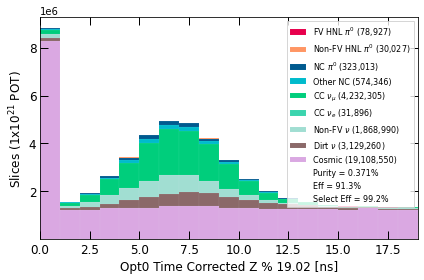

In [15]:
width = 19.02

df_hnl['mod_t'] = df_hnl['slc_opt0_time_corrected_Z_pandora']%width
df_nu['mod_t'] = df_nu['slc_opt0_time_corrected_Z_pandora']%width
df_cos['mod_t'] = df_cos['slc_opt0_time_corrected_Z_pandora']%width
#----------------------------------------------
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_precosmics.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Save Purity and Eff </h1>

In [16]:
purity_arr, eff_arr, cut_arr = [], [], []

In [17]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)


purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Clear Cosmics Removal")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.3708769941258626]
[99.23830250272036]
['Clear Cosmics Removal']


<h1> CRUMBS </h1>

<Figure size 432x288 with 0 Axes>

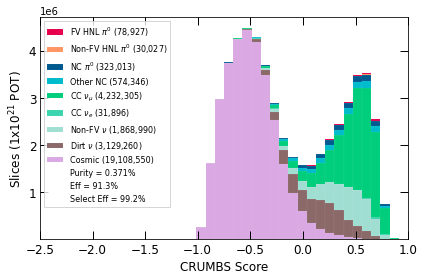

In [18]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_crumbs_score', 
                    scaleHNLPlot,
                    xmin = -2.5, xmax =1, xnbin = 40,
                    xtitle = 'CRUMBS Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"crumbs_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [19]:
def vary_crumbsScore(df_hnl, df_nu, df_cos):
    
    step = 0.02
    cutStep = np.arange(-1.0, 1 + step, step)
    
    p_arr, eff_arr, peff_arr = [], [], []
    
    purity_start, eff_start = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)
    
    for c in cutStep:
        df_hnl_cut = cutCosmics(df_hnl, crumbsScore = c)
        df_nu_cut = cutCosmics(df_nu, crumbsScore = c)
        df_cos_cut = cutCosmics(df_cos, crumbsScore = c)
        
        purity, eff = calc_purity_eff(df_hnl_cut, df_nu_cut, df_cos_cut, true_counts, start_counts)
        
        p_arr.append(purity)
        eff_arr.append(eff)
        peff_arr.append(purity*eff)
    
    plot_purity_eff(p_arr, eff_arr, peff_arr, cutStep, purity_start, eff_start, loc = 'center left')


-------------------------------------
Best Cut Score PE = 0.14
Purity = 1.21923
Eff = 85.765
Purity - Start Purity = 0.848358
Eff - Start Eff = -13.4733
-------------------------------------
Best Cut Score P = 0.76
Purity = 3.31329
Eff = 4.10881
Purity - Start Purity = 2.94241
Eff - Start Eff = -95.1295


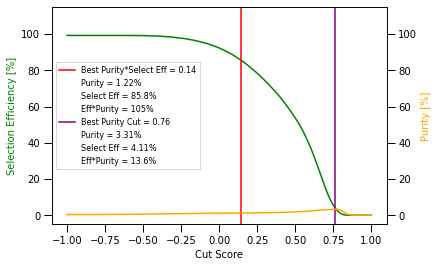

In [20]:
if ifTune:
    vary_crumbsScore(df_hnl, df_nu, df_cos)
    
    if ifSave:
        plt.savefig(savePath+"/crumbs_tuning.png", dpi =200)

<h3>Apply Cut</h3>

In [21]:
score = TuneCut['crumbs']
print(score)

df_hnl = cutCosmics(df_hnl, crumbsScore = score)
df_nu = cutCosmics(df_nu, crumbsScore = score)
df_cos = cutCosmics(df_cos, crumbsScore = score)

0.14


<h3>Save Purity/Eff</h3>

In [22]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("CRUMBS")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.3708769941258626, 1.2192345003374452]
[99.23830250272036, 85.76496191512516]
['Clear Cosmics Removal', 'CRUMBS']


<Figure size 432x288 with 0 Axes>

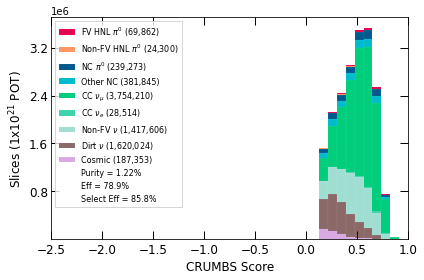

In [23]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_crumbs_score', 
                    scaleHNLPlot,
                    xmin = -2.5, xmax =1, xnbin = 40,
                    xtitle = 'CRUMBS Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"crumbs_postcut.png", dpi = 200)
#-----------------------------------#

plt.show()

<h1> Fiducial Volume </h1>

<Figure size 432x288 with 0 Axes>

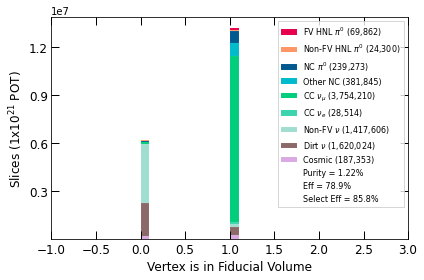

In [24]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_is_fv', 
                    scaleHNLPlot,
                    xmin = -1, xmax = 3, xnbin = 40,
                    xtitle = 'Vertex is in Fiducial Volume'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"fv_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3>Apply Cut</h3>

In [25]:
df_hnl = cutFV(df_hnl)
df_nu = cutFV(df_nu)
df_cos = cutFV(df_cos)

<h3>Save Purity/Eff</h3>

In [26]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Vertex In FV")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.3708769941258626, 1.2192345003374452, 1.430075041871336]
[99.23830250272036, 85.76496191512516, 62.44396082698586]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV']


<Figure size 432x288 with 0 Axes>

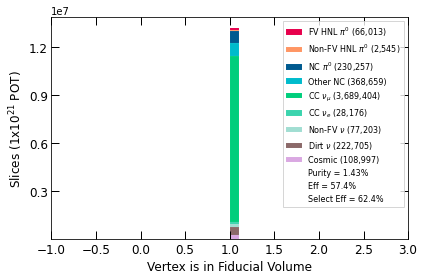

In [27]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_is_fv', 
                    scaleHNLPlot,
                    xmin = -1, xmax = 3, xnbin = 40,
                    xtitle = 'Vertex is in Fiducial Volume'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"fv_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Opt0 Score </h1>

<Figure size 432x288 with 0 Axes>

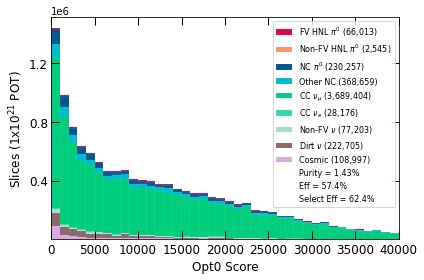

In [28]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_opt0_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 40000, xnbin = 40,
                    xtitle = 'Opt0 Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [29]:
def vary_OpT0Score(df_hnl, df_nu, df_cos):
    
    step = 50
    cutStep = np.arange(0, 2000 + step, step)
    
    p_arr, eff_arr, peff_arr = [], [], []
    
    purity_start, eff_start = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)
  
    for c in cutStep:
        df_hnl_cut = cutOpt0Score(df_hnl, Opt0Score = c)
        df_nu_cut = cutOpt0Score(df_nu, Opt0Score = c)
        df_cos_cut = cutOpt0Score(df_cos, Opt0Score = c)
        
        purity, eff = calc_purity_eff(df_hnl_cut, df_nu_cut, df_cos_cut, true_counts, start_counts)
        
        p_arr.append(purity)
        eff_arr.append(eff)
        peff_arr.append(purity*eff)
     
    plot_purity_eff(p_arr, eff_arr, peff_arr, cutStep, purity_start, eff_start, loc = 'center left')

-------------------------------------
Best Cut Score PE = 1550
Purity = 1.59654
Eff = 58.3852
Purity - Start Purity = 0.166462
Eff - Start Eff = -4.05876
-------------------------------------
Best Cut Score P = 2000
Purity = 1.62229
Eff = 57.1774
Purity - Start Purity = 0.192219
Eff - Start Eff = -5.26659


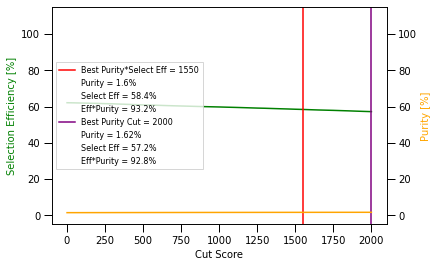

In [30]:
if ifTune:
    vary_OpT0Score(df_hnl, df_nu, df_cos)
    if ifSave:
        plt.savefig(savePath+"/opt0score_tuning.png", dpi =200)

<h3> Apply Cut </h3>

In [31]:
score = TuneCut['Opt0Score']

df_hnl = cutOpt0Score(df_hnl, Opt0Score = score)
df_nu = cutOpt0Score(df_nu, Opt0Score = score)
df_cos = cutOpt0Score(df_cos, Opt0Score = score)

<h3>Save Purity/Eff</h3>

In [32]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Opt0 Score")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.3708769941258626, 1.2192345003374452, 1.430075041871336, 1.59653705732805]
[99.23830250272036, 85.76496191512516, 62.44396082698586, 58.38520130576714]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Opt0 Score']


<Figure size 432x288 with 0 Axes>

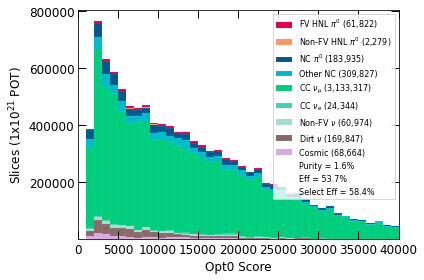

In [33]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_opt0_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 40000, xnbin = 40,
                    xtitle = 'Opt0 Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0score_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Opt0 Frac </h1>

<Figure size 432x288 with 0 Axes>

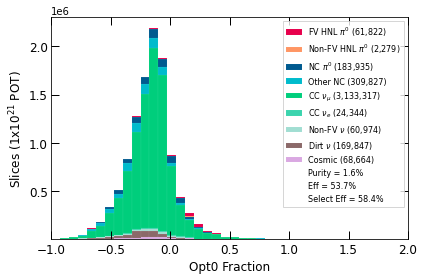

In [34]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_opt0_frac', 
                    scaleHNLPlot,
                    xmin = -1, xmax = 2, xnbin = 40,
                    xtitle = 'Opt0 Fraction'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0frac_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [35]:
def vary_OpT0FracMore(df_hnl, df_nu, df_cos):
    
    step = 0.02
    cutStep = np.arange(-1, 0.5 + step, step)
    
    p_arr, eff_arr, peff_arr = [], [], []
    
    purity_start, eff_start = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)
    
    for c in cutStep:
        df_hnl_cut = cutOpt0Frac(df_hnl, Opt0FracMore = c, Opt0FracLess = 999)
        df_nu_cut = cutOpt0Frac(df_nu, Opt0FracMore = c, Opt0FracLess = 999)
        df_cos_cut = cutOpt0Frac(df_cos, Opt0FracMore = c, Opt0FracLess = 999)
        
        purity, eff = calc_purity_eff(df_hnl_cut, df_nu_cut, df_cos_cut, true_counts, start_counts)
    
        p_arr.append(purity)
        eff_arr.append(eff)
        peff_arr.append(purity*eff)
     
    plot_purity_eff(p_arr, eff_arr, peff_arr, cutStep, purity_start, eff_start, loc = 'center left')

In [36]:
def vary_OpT0FracLess(df_hnl, df_nu, df_cos):
    
    step = 0.02
    cutStep = np.arange(0, 2 + step, step)
    
    p_arr, eff_arr, peff_arr = [], [], []
    
    purity_start, eff_start = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)
    
    for c in cutStep:
        df_hnl_cut = cutOpt0Frac(df_hnl, Opt0FracMore = -999, Opt0FracLess = c)
        df_nu_cut = cutOpt0Frac(df_nu, Opt0FracMore = -999, Opt0FracLess = c)
        df_cos_cut = cutOpt0Frac(df_cos, Opt0FracMore = -999, Opt0FracLess = c)
        
        purity, eff = calc_purity_eff(df_hnl_cut, df_nu_cut, df_cos_cut, true_counts, start_counts)
    
        p_arr.append(purity)
        eff_arr.append(eff)
        peff_arr.append(purity*eff)
     
    plot_purity_eff(p_arr, eff_arr, peff_arr, cutStep, purity_start, eff_start, loc = 'center right')

-------------------------------------
Best Cut Score PE = 0.12
Purity = 16.9918
Eff = 36.7356
Purity - Start Purity = 15.3953
Eff - Start Eff = -21.6496
-------------------------------------
Best Cut Score P = 0.16
Purity = 18.3486
Eff = 31.0294
Purity - Start Purity = 16.7521
Eff - Start Eff = -27.3558


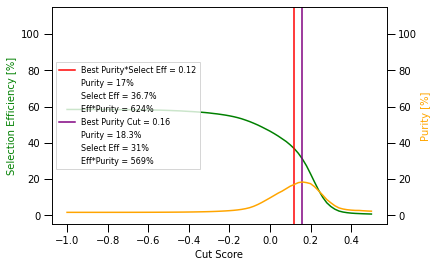

In [37]:
if ifTune:
    vary_OpT0FracMore(df_hnl, df_nu, df_cos)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_more_tuning.png", dpi =200)

<h3> Apply Cut </h3>

In [38]:
fracMore = TuneCut['Opt0FracMore']

df_hnl = cutOpt0Frac(df_hnl, Opt0FracMore = fracMore, ifOpt0FracLess = False)
df_nu = cutOpt0Frac(df_nu, Opt0FracMore = fracMore, ifOpt0FracLess = False)
df_cos = cutOpt0Frac(df_cos, Opt0FracMore = fracMore, ifOpt0FracLess = False)

<h3>Save Purity/Eff</h3>

In [39]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Opt0 Fraction")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.3708769941258626, 1.2192345003374452, 1.430075041871336, 1.59653705732805, 16.9918099546409]
[99.23830250272036, 85.76496191512516, 62.44396082698586, 58.38520130576714, 36.73558215451578]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Opt0 Score', 'Opt0 Fraction']


<Figure size 432x288 with 0 Axes>

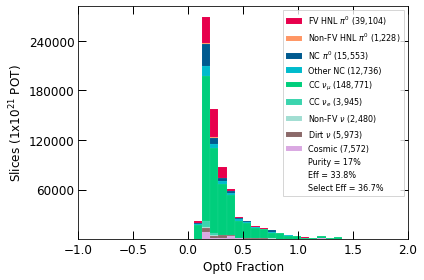

In [40]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_opt0_frac', 
                    scaleHNLPlot,
                    xmin = -1, xmax = 2, xnbin = 40,
                    xtitle = 'Opt0 Fraction'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0frac_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Make Beam Bucket - Pre PID</h1>

<Figure size 432x288 with 0 Axes>

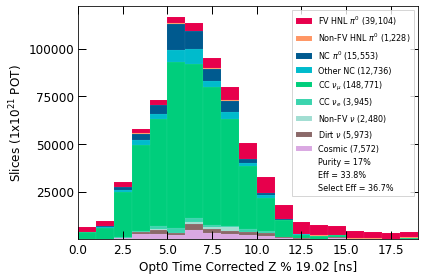

In [41]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]"
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_prepid.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Muon Rejection</h1>

<Figure size 432x288 with 0 Axes>

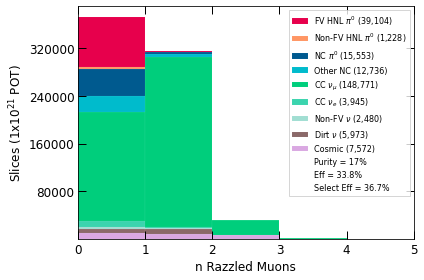

<Figure size 432x288 with 0 Axes>

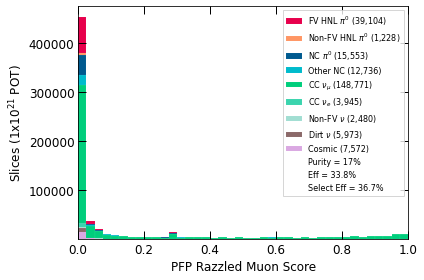

In [42]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_muons', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Muons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_muon_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_muon_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Muon Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_muon_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [43]:
def vary_MuonScore(df_hnl, df_nu, df_cos):
    
    step = 0.02
    cutStep = np.arange(0, 1 + step, step)
    
    p_arr, eff_arr, peff_arr = [], [], []
    
    purity_start, eff_start = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)
    
    for c in cutStep:
        df_hnl_cut = cutMuon(df_hnl, muonScore = c)
        df_nu_cut = cutMuon(df_nu, muonScore = c)
        df_cos_cut = cutMuon(df_cos, muonScore = c)
        
        purity, eff = calc_purity_eff(df_hnl_cut, df_nu_cut, df_cos_cut, true_counts, start_counts)
        
        p_arr.append(purity)
        eff_arr.append(eff)
        peff_arr.append(purity*eff)
     
    plot_purity_eff(p_arr, eff_arr, peff_arr, cutStep, purity_start, eff_start , loc = 'center right')


-------------------------------------
Best Cut Score PE = 0.04
Purity = 52.673
Eff = 29.8868
Purity - Start Purity = 35.6812
Eff - Start Eff = -6.84875
-------------------------------------
Best Cut Score P = 0.02
Purity = 54.9857
Eff = 25.1817
Purity - Start Purity = 37.9939
Eff - Start Eff = -11.5539


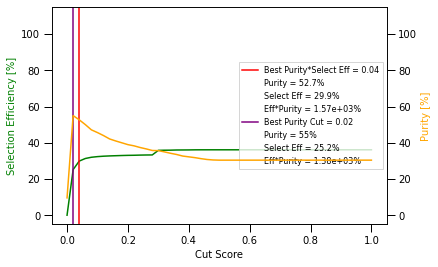

In [44]:
if ifTune:
    vary_MuonScore(df_hnl, df_nu, df_cos)
    if ifSave:
        plt.savefig(savePath+"/muon_tuning.png", dpi =200)

<h3> Apply Cut</h3>

In [45]:
muonScore = TuneCut['Muon']

df_hnl = cutMuon(df_hnl, muonScore =muonScore)
df_nu = cutMuon(df_nu, muonScore =muonScore)
df_cos = cutMuon(df_cos,muonScore =muonScore)

<h3>Save Purity/Eff</h3>

In [46]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Muon Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.3708769941258626, 1.2192345003374452, 1.430075041871336, 1.59653705732805, 16.9918099546409, 52.673041366502225]
[99.23830250272036, 85.76496191512516, 62.44396082698586, 58.38520130576714, 36.73558215451578, 29.886833514689886]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Opt0 Score', 'Opt0 Fraction', 'Muon Cut']


<Figure size 432x288 with 0 Axes>

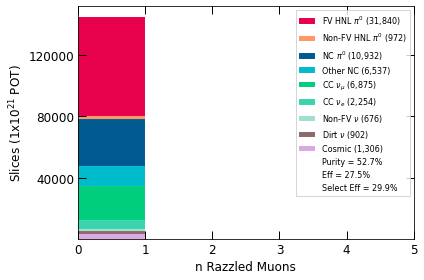

<Figure size 432x288 with 0 Axes>

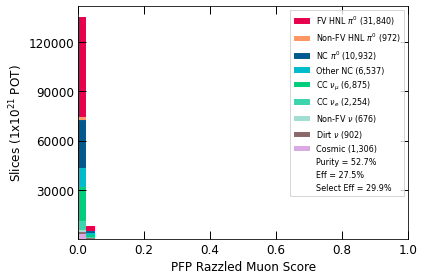

In [47]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_muons', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Muons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_muon_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_muon_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Muon Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_muon_score_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Make Beam Bucket - Post Muon</h1>

<Figure size 432x288 with 0 Axes>

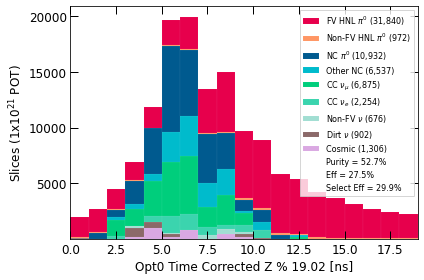

In [48]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]"
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postmuon.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Proton Rejection</h1>

<Figure size 432x288 with 0 Axes>

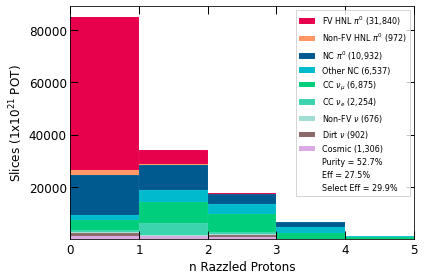

<Figure size 432x288 with 0 Axes>

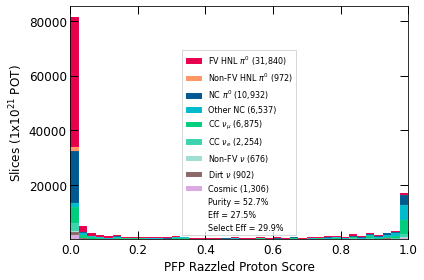

In [49]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_protons_thresh', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Protons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_proton_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_proton_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Proton Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_proton_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [50]:
def vary_ProtonScore(df_hnl, df_nu, df_cos):
    
    step = 0.02
    cutStep = np.arange(0, 1 + step, step)
    
    p_arr, eff_arr, peff_arr = [], [], []
    
    purity_start, eff_start  = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)
    
    for c in cutStep:
        df_hnl_cut = cutProton(df_hnl, nProton = 0, protonScore = c)
        df_nu_cut = cutProton(df_nu, nProton = 0, protonScore = c)
        df_cos_cut = cutProton(df_cos, nProton = 0, protonScore = c)
        
        purity, eff = calc_purity_eff(df_hnl_cut, df_nu_cut, df_cos_cut, true_counts, start_counts)
        
        p_arr.append(purity)
        eff_arr.append(eff)
        peff_arr.append(purity*eff)
     
    plot_purity_eff(p_arr, eff_arr, peff_arr, cutStep, purity_start, eff_start, loc = 'center right')
    #plt.xlim(0, 0.1)

-------------------------------------
Best Cut Score PE =   1
Purity = 74.3315
Eff = 28.2437
Purity - Start Purity = 21.6584
Eff - Start Eff = -1.64309
-------------------------------------
Best Cut Score P = 0.02
Purity = 79.9051
Eff = 18.1393
Purity - Start Purity = 27.232
Eff - Start Eff = -11.7476


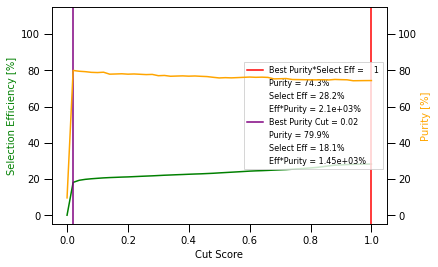

In [51]:
if ifTune:
    vary_ProtonScore(df_hnl, df_nu, df_cos)
    if ifSave:
        plt.savefig(savePath+"/proton_tuning.png", dpi =200)

<h3>Apply Cut</h3>

In [52]:
protonScore = TuneCut['Proton']

df_hnl = cutProton(df_hnl, nProton = 0, protonScore = protonScore)
df_nu = cutProton(df_nu, nProton = 0, protonScore = protonScore)
df_cos = cutProton(df_cos, nProton = 0, protonScore = protonScore)

<h3>Save Purity/Eff</h3>

In [53]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Proton Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.3708769941258626, 1.2192345003374452, 1.430075041871336, 1.59653705732805, 16.9918099546409, 52.673041366502225, 74.33145380937546]
[99.23830250272036, 85.76496191512516, 62.44396082698586, 58.38520130576714, 36.73558215451578, 29.886833514689886, 28.243743199129494]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Opt0 Score', 'Opt0 Fraction', 'Muon Cut', 'Proton Cut']


<Figure size 432x288 with 0 Axes>

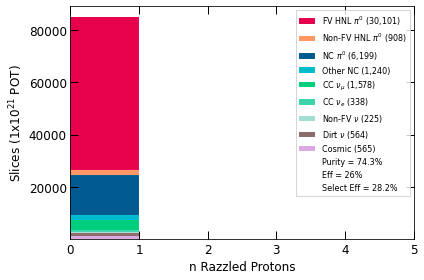

<Figure size 432x288 with 0 Axes>

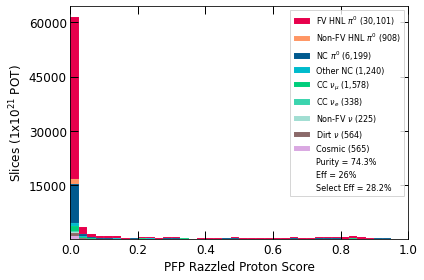

In [54]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_protons_thresh', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Protons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_proton_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_proton_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Proton Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_proton_score_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Make Beam Bucket - Post Proton</h1>

<Figure size 432x288 with 0 Axes>

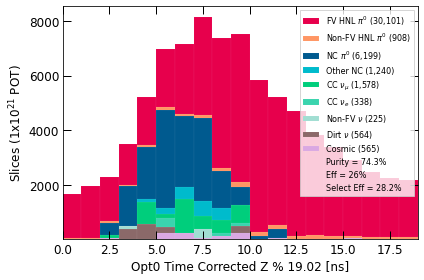

In [55]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]"
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postproton.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Pion Rejection</h1>

<Figure size 432x288 with 0 Axes>

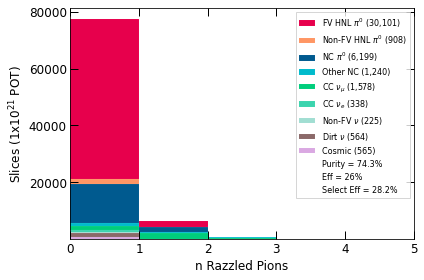

<Figure size 432x288 with 0 Axes>

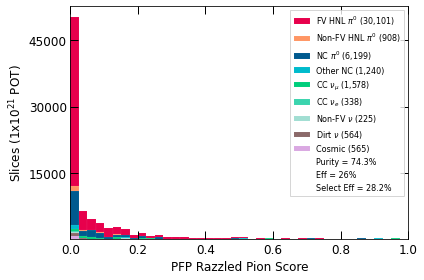

In [56]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_pions_thresh', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Pions'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_pion_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_pion_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Pion Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_pion_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [57]:
def vary_PionScore(df_hnl, df_nu, df_cos):
    
    step = 0.02
    cutStep = np.arange(0, 1 + step, step)
    
    p_arr, eff_arr, peff_arr = [], [], []
    
    purity_start, eff_start  = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)
    
    for c in cutStep:
        df_hnl_cut = cutPion(df_hnl, nPion = 0, pionScore = c)
        df_nu_cut = cutPion(df_nu, nPion = 0, pionScore = c)
        df_cos_cut = cutPion(df_cos, nPion = 0, pionScore = c)
        
        purity, eff = calc_purity_eff(df_hnl_cut, df_nu_cut, df_cos_cut, true_counts, start_counts)
        
        p_arr.append(purity)
        eff_arr.append(eff)
        peff_arr.append(purity*eff)
     
    plot_purity_eff(p_arr, eff_arr, peff_arr, cutStep, purity_start, eff_start, loc = 'center right')


-------------------------------------
Best Cut Score PE = 0.98
Purity = 77.9393
Eff = 27.5517
Purity - Start Purity = 3.60788
Eff - Start Eff = -0.692057
-------------------------------------
Best Cut Score P = 0.02
Purity = 83.2791
Eff = 14.8596
Purity - Start Purity = 8.94768
Eff - Start Eff = -13.3841


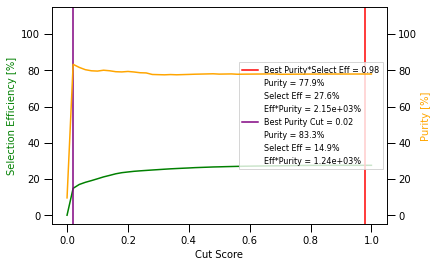

In [58]:
if ifTune:
    vary_PionScore(df_hnl, df_nu, df_cos)
    if ifSave:
        plt.savefig(savePath+"/pion_tuning.png", dpi =200)

<h3>Apply Cut </h3>

In [59]:
pionScore = TuneCut['Pion']

df_hnl = cutPion(df_hnl, nPion = 0, pionScore = pionScore)
df_nu = cutPion(df_nu, nPion = 0, pionScore = pionScore)
df_cos = cutPion(df_cos, nPion = 0, pionScore = pionScore)

<h3>Save Purity/Eff</h3>

In [60]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Pion Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.3708769941258626, 1.2192345003374452, 1.430075041871336, 1.59653705732805, 16.9918099546409, 52.673041366502225, 74.33145380937546, 77.9393360330066]
[99.23830250272036, 85.76496191512516, 62.44396082698586, 58.38520130576714, 36.73558215451578, 29.886833514689886, 28.243743199129494, 27.551686615886833]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Opt0 Score', 'Opt0 Fraction', 'Muon Cut', 'Proton Cut', 'Pion Cut']


<Figure size 432x288 with 0 Axes>

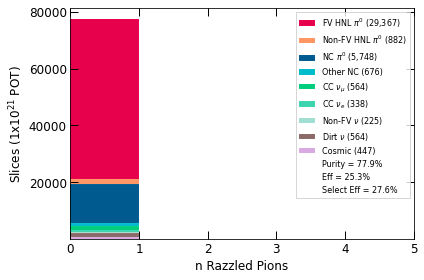

<Figure size 432x288 with 0 Axes>

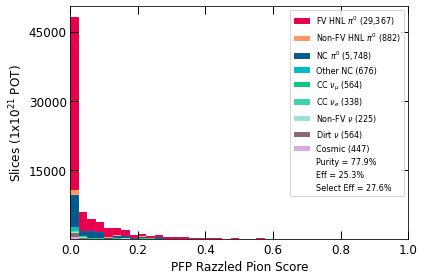

In [61]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_pions_thresh', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Pions'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_pion_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_pion_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Pion Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_pion_score_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Make Beam Bucket - Post Pion</h1>

<Figure size 432x288 with 0 Axes>

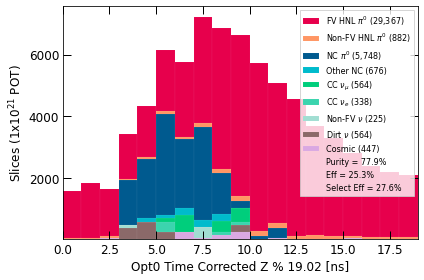

In [62]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]"
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postpion.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Electron Rejection (?)</h1>

<Figure size 432x288 with 0 Axes>

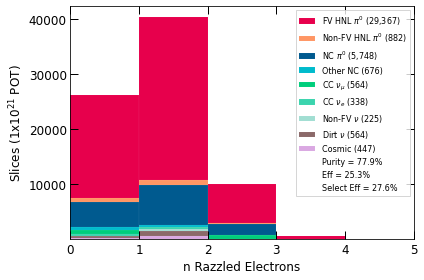

<Figure size 432x288 with 0 Axes>

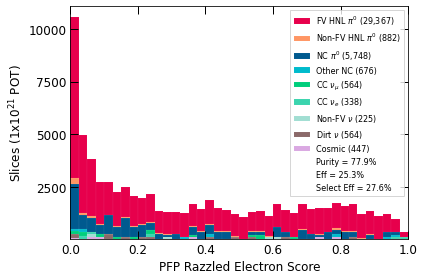

In [63]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_electrons', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Electrons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_electron_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_electron_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Electron Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_electron_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Photon Selection (?)</h1>

<Figure size 432x288 with 0 Axes>

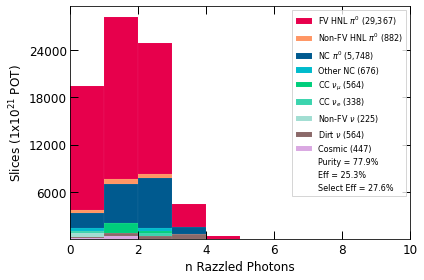

<Figure size 432x288 with 0 Axes>

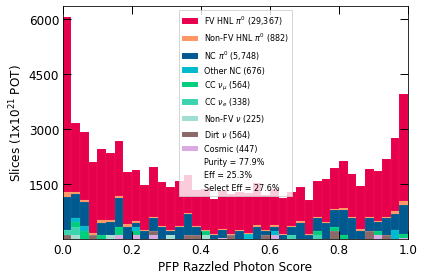

In [64]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_photons', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Razzled Photons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_photon_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_photon_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Photon Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_photon_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Shower Stuff</h1>

<h3> Split into 1 shower and multi shower case </h3>

In [65]:
def split_my_df(df):
    temp = df[['run', 'subrun', 'event', 'slc_idx'
                   , 'slc_pfp_shower_energy', 'slc_comp', 'scale_pot', 'slc_true_event_type'
                    , 'slc_pfp_shower_dir_x' , 'slc_pfp_shower_dir_y' , 'slc_pfp_shower_dir_z'
                   , 'slc_pfp_shower_theta', 'slc_pfp_shower_phi', 'slc_pfp_shower_conv_gap'
                  ]]
    temp["pfp_idx"] = temp.groupby(['run', 'subrun', 'event', 'slc_idx']).transform("cumcount").add(1) - 1
    temp = temp.set_index(['run', 'subrun', 'event', 'slc_idx']).reset_index()
    
    temp1 = temp.groupby(['run', 'subrun', 'event', 'slc_idx'])['slc_pfp_shower_energy'].apply(list).reset_index()
    temp2 = temp.groupby(['run', 'subrun', 'event', 'slc_idx'])['pfp_idx'].apply(list).reset_index()
    temp3 = temp.groupby(['run', 'subrun', 'event', 'slc_idx'])['slc_pfp_shower_dir_x'].apply(list).reset_index()
    temp4 = temp.groupby(['run', 'subrun', 'event', 'slc_idx'])['slc_pfp_shower_dir_y'].apply(list).reset_index()
    temp5 = temp.groupby(['run', 'subrun', 'event', 'slc_idx'])['slc_pfp_shower_dir_z'].apply(list).reset_index()
    temp6 = temp.groupby(['run', 'subrun', 'event', 'slc_idx'])['slc_pfp_shower_theta'].apply(list).reset_index()
    temp7 = temp.groupby(['run', 'subrun', 'event', 'slc_idx'])['slc_pfp_shower_phi'].apply(list).reset_index()
    temp8 = temp.groupby(['run', 'subrun', 'event', 'slc_idx'])['slc_pfp_shower_conv_gap'].apply(list).reset_index()

    
    concat = pd.concat([temp1, temp2, temp3, temp4, temp5, temp6, temp7, temp8], axis = 1)
    
    concat = concat.loc[:, ~concat.columns.duplicated()]
    
    concat['n_pfp'] = concat.apply(lambda row: len(row['slc_pfp_shower_energy']), axis=1)
    
    #1 shower selection
    shw1 = concat[concat['n_pfp'] == 1]
    shw1 = shw1.drop(columns = ['slc_pfp_shower_energy', 'pfp_idx'
                                , 'slc_pfp_shower_dir_x', 'slc_pfp_shower_dir_y', 'slc_pfp_shower_dir_z'
                                ,'slc_pfp_shower_theta' ,'slc_pfp_shower_phi', 'slc_pfp_shower_conv_gap'
                               ])
    shw1 = shw1.merge(temp, how='inner', on=['run','subrun','event','slc_idx'])
    
    #2+ shower selection
    shw2more = concat[concat['n_pfp'] >= 2]
    temp = temp.drop(columns = ['slc_pfp_shower_energy', 'pfp_idx'
                                , 'slc_pfp_shower_dir_x', 'slc_pfp_shower_dir_y', 'slc_pfp_shower_dir_z'
                                ,'slc_pfp_shower_theta' ,'slc_pfp_shower_phi', 'slc_pfp_shower_conv_gap'
                               ])

    shw2more = shw2more.merge(temp, how='inner', on=['run','subrun','event','slc_idx'])
    
    return shw1, shw2more

In [66]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

<h1>1 Shower Case: Shower Theta</h1>

<Figure size 432x288 with 0 Axes>

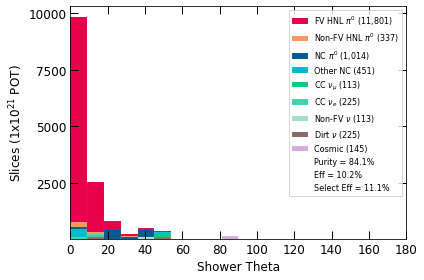

In [67]:
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_theta', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 180, xnbin = 20,
                    xtitle = 'Shower Theta'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_theta_precut.png", dpi = 200)
#-----------------------------------#
plt.show()


In [68]:
def vary_Theta(df_hnl, df_nu, df_cos):
    
    step = 0.2
    cutStep = np.arange(6, 25 + step, step)
    
    p_arr, eff_arr, peff_arr = [], [], []
    
    purity_start, eff_start = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)
    
    for c in cutStep:
        df_hnl_cut = cutThetaAngle(df_hnl, thetaAngle = c) 
        df_nu_cut = cutThetaAngle(df_nu, thetaAngle = c) 
        df_cos_cut = cutThetaAngle(df_cos, thetaAngle = c) 
        
        purity, eff = calc_purity_eff(df_hnl_cut, df_nu_cut, df_cos_cut, true_counts, start_counts)
        
        p_arr.append(purity)
        eff_arr.append(eff)
        peff_arr.append(purity*eff)
    
    pMax = max(p_arr)
    bestIndex = p_arr.index(pMax)
    
    del p_arr[bestIndex]
    del eff_arr[bestIndex]
    del peff_arr[bestIndex]
    cutStep = np.delete(cutStep, bestIndex)
    
    plot_purity_eff(p_arr, eff_arr, peff_arr, cutStep, purity_start, eff_start, loc = 'center right')

-------------------------------------
Best Cut Score PE = 24.4
Purity = 92.0913
Eff = 10.7835
Purity - Start Purity = 7.94418
Eff - Start Eff = -0.272035
-------------------------------------
Best Cut Score P = 6.6
Purity = 95.478
Eff = 6.54842
Purity - Start Purity = 11.3309
Eff - Start Eff = -4.50707


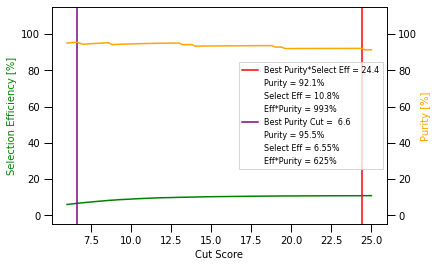

In [69]:
if ifTune:
    vary_Theta(df_hnl_shw1, df_nu_shw1, df_cos_shw1)
    if ifSave:
        plt.savefig(savePath+"/one_shower_theta_tuning.png", dpi =200)

<h3>Apply Cut</h3>

In [70]:
angle = TuneCut['OneShowerTheta']

df_hnl_shw1 = cutThetaAngle(df_hnl_shw1, thetaAngle = angle) 
df_nu_shw1 = cutThetaAngle(df_nu_shw1, thetaAngle = angle) 
df_cos_shw1 = cutThetaAngle(df_cos_shw1, thetaAngle = angle) 
#df_cos = cutThetaAngle(df_cos, thetaAngle = angle) 

<Figure size 432x288 with 0 Axes>

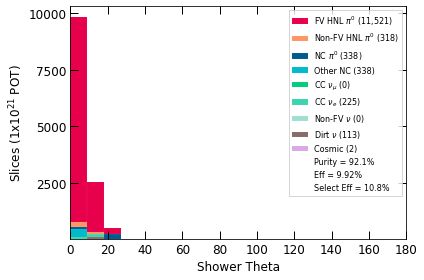

In [71]:
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_theta', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 180, xnbin = 20,
                    xtitle = 'Shower Theta'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_theta_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()


<h1>2 Shower Case: Shower Theta</h1>

In [72]:
df_nu_shw2 = df_nu_shw2.apply(pd.Series.explode).reset_index()
df_hnl_shw2 = df_hnl_shw2.apply(pd.Series.explode).reset_index()
df_cos_shw2 = df_cos_shw2.apply(pd.Series.explode).reset_index()

<Figure size 432x288 with 0 Axes>

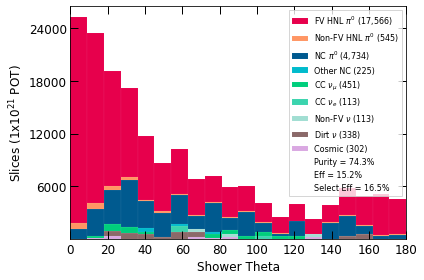

In [73]:
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_theta', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 180, xnbin = 20,
                    xtitle = 'Shower Theta'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_shower_theta_precut.png", dpi = 200)
#-----------------------------------#
plt.show()


-------------------------------------
Best Cut Score PE = 24.6
Purity = 84.5056
Eff = 14.7704
Purity - Start Purity = 10.2381
Eff - Start Eff = -1.72579
-------------------------------------
Best Cut Score P = 7.2
Purity = 98.4318
Eff = 6.8531
Purity - Start Purity = 24.1643
Eff - Start Eff = -9.64309


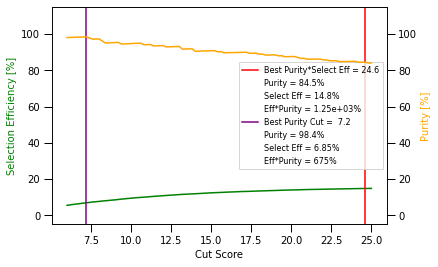

In [74]:
if ifTune:
    vary_Theta(df_hnl_shw2, df_nu_shw2, df_cos_shw2)
    if ifSave:
        plt.savefig(savePath+"/two_shower_theta_tuning.png", dpi =200)

<h3>Apply Cut</h3>

In [75]:
angle = TuneCut['TwoShowerTheta']

df_hnl_shw2 = cutThetaAngle(df_hnl_shw2, thetaAngle = angle) 
df_nu_shw2 = cutThetaAngle(df_nu_shw2, thetaAngle = angle) 
df_cos_shw2 = cutThetaAngle(df_cos_shw2, thetaAngle = angle) 
#df_cos = cutThetaAngle(df_cos, thetaAngle = angle) 

<Figure size 432x288 with 0 Axes>

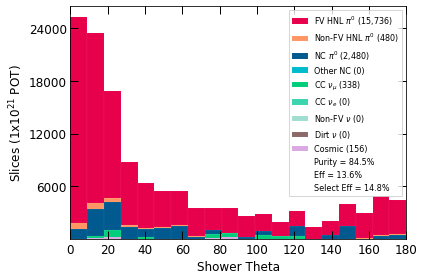

In [76]:
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_theta', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 180, xnbin = 20,
                    xtitle = 'Shower Theta'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_shower_theta_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()


<h3>Merge The Cut Back</h3>

In [77]:
def apply_shower_cut(df, dfshw1, dfshw2):
    temp1 = dfshw1[['run','subrun','event','slc_idx']]
    temp1 = temp1.merge(df, how='inner', on=['run','subrun','event','slc_idx'])
    
    temp2 = dfshw2[['run','subrun','event','slc_idx']]
    temp2 = temp2.merge(df, how='inner', on=['run','subrun','event','slc_idx'])
    
    concat = pd.concat([temp1, temp2])
    concat = concat.drop_duplicates()
    
    return concat

In [78]:
df_hnl = apply_shower_cut(df_hnl, df_hnl_shw1, df_hnl_shw2)
df_nu = apply_shower_cut(df_nu, df_nu_shw1, df_nu_shw2)
df_cos = apply_shower_cut(df_cos, df_cos_shw1, df_cos_shw2)

<h3>Save Purity/Eff</h3>

In [79]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Shower Theta Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.3708769941258626, 1.2192345003374452, 1.430075041871336, 1.59653705732805, 16.9918099546409, 52.673041366502225, 74.33145380937546, 77.9393360330066, 87.54876799096964]
[99.23830250272036, 85.76496191512516, 62.44396082698586, 58.38520130576714, 36.73558215451578, 29.886833514689886, 28.243743199129494, 27.551686615886833, 25.55386289445049]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Opt0 Score', 'Opt0 Fraction', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Shower Theta Cut']


<h1> Make Beam Bucket - Post Shower Theta</h1>

<Figure size 432x288 with 0 Axes>

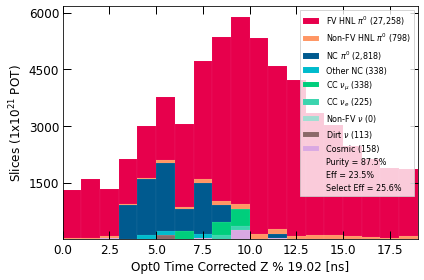

In [80]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]'
                    )

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postshowertheta.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>1 Shower Case: Shower Energy and Conversion Gap </h1>

<h3> Split into 1 shower and multi shower case again! </h3>

In [81]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

#df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

<Figure size 432x288 with 0 Axes>

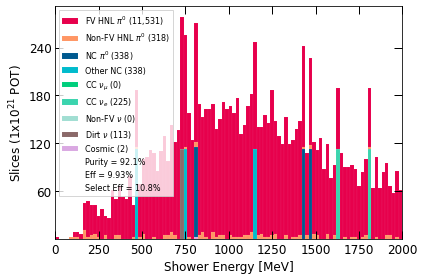

<Figure size 432x288 with 0 Axes>

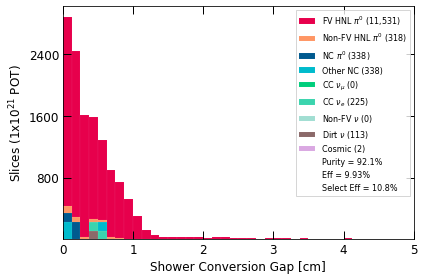

In [82]:
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_energy', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 2000, xnbin = 100,
                    xtitle = 'Shower Energy [MeV]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_energy_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_conv_gap', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 40,
                    xtitle = 'Shower Conversion Gap [cm]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_convgap_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>2 Shower Case: Shower Energy and Conversion Gap </h1>

In [83]:
df_nu_shw2 = df_nu_shw2.apply(pd.Series.explode).reset_index()
df_hnl_shw2 = df_hnl_shw2.apply(pd.Series.explode).reset_index()
#df_cos_shw2 = df_cos_shw2.apply(pd.Series.explode).reset_index()

<Figure size 432x288 with 0 Axes>

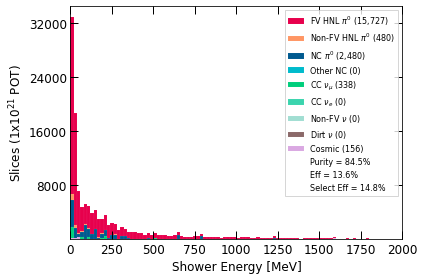

<Figure size 432x288 with 0 Axes>

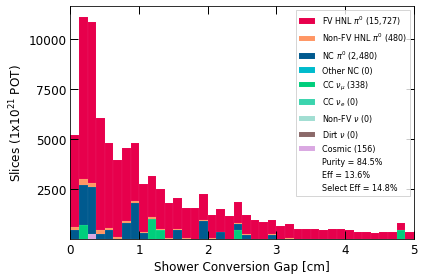

In [84]:
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_energy', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 2000, xnbin = 100,
                    xtitle = 'Shower Energy [MeV]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_shower_energy_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_conv_gap', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 40,
                    xtitle = 'Shower Conversion Gap [cm]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_shower_convgap_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>2 Shower Case: Pi0 Mass </h1>

<h3> Split into 1 shower and multi shower case again! </h3>

In [85]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

#df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

In [86]:
def pi0mass(x):
    
    mBest = -999
    diff = 99999;
    
    for i in range(0, x['n_pfp']):
        for j in range(0, x['n_pfp']):
            if i == j:
                continue
            else:
                v1 = [x['slc_pfp_shower_dir_x'][0], x['slc_pfp_shower_dir_y'][0], x['slc_pfp_shower_dir_z'][0]]
                v2 = [x['slc_pfp_shower_dir_x'][1], x['slc_pfp_shower_dir_y'][1], x['slc_pfp_shower_dir_z'][1]]
    
                v1_u = unit_vector(v1)
                v2_u = unit_vector(v2)
    
                cosTheta = np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)

                mass = np.sqrt(2 * x['slc_pfp_shower_energy'][0] * x['slc_pfp_shower_energy'][1] * (1 - cosTheta ));
                
                if abs(mass - 135) < diff:
                    mBest = mass
    return mBest

In [87]:
df_hnl_shw2['pi0_mass'] = df_hnl_shw2.apply(lambda row: pi0mass(row), axis = 1)

#df_nu_shw2['pi0_mass'] = ""
df_nu_shw2['pi0_mass'] = df_nu_shw2.apply(lambda row: pi0mass(row), axis = 1)

df_cos['pi0_mass']  = ""
#df_cos_shw2['pi0_mass'] = ""
#df_cos_shw2['pi0_mass'] = df_cos_shw2.apply(lambda row: pi0mass(row), axis = 1)

<Figure size 432x288 with 0 Axes>

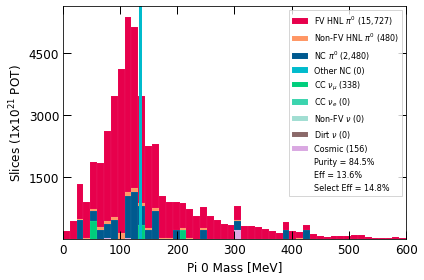

In [88]:
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
                    true_counts, start_counts, 
                    'pi0_mass', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 600, xnbin = 50,
                    xtitle = 'Pi 0 Mass [MeV]'
            )
# only one line may be specified; full height
plt.axvline(x = 135, color = col_dict['Aqua'], linewidth = 3)

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"pizero_mass_precut.png", dpi = 200)
#-----------------------------------#

plt.show()

<h3>Apply Cut</h3>

In [89]:
df_hnl_shw2 = df_hnl_shw2[(df_hnl_shw2['pi0_mass'] > 20) &(df_hnl_shw2['pi0_mass'] < 250)]
df_nu_shw2 = df_nu_shw2[(df_nu_shw2['pi0_mass'] > 20) &(df_nu_shw2['pi0_mass'] < 250)]
#df_cos_shw2 = df_cos_shw2[(df_cos_shw2['pi0_mass'] > 20) &(df_cos_shw2['pi0_mass'] < 250)]

<Figure size 432x288 with 0 Axes>

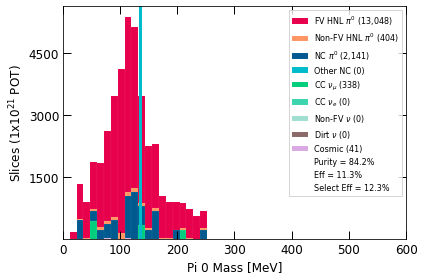

In [90]:
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
                    true_counts, start_counts, 
                    'pi0_mass', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 600, xnbin = 50,
                    xtitle = 'Pi 0 Mass [MeV]'
            )
# only one line may be specified; full height
plt.axvline(x = 135, color = col_dict['Aqua'], linewidth = 3)
 
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"pizero_mass_postcut.png", dpi = 200)
#-----------------------------------#

plt.show()

<h3>Merge The Cut Back</h3>

In [91]:
df_hnl = apply_shower_cut(df_hnl, df_hnl_shw1, df_hnl_shw2)
df_nu = apply_shower_cut(df_nu, df_nu_shw1, df_nu_shw2)
#df_cos = apply_shower_cut(df_cos, df_cos_shw1, df_cos_shw2)

<h3>Save Purity/Eff</h3>

In [92]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Pion Zero Mass")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.3708769941258626, 1.2192345003374452, 1.430075041871336, 1.59653705732805, 16.9918099546409, 52.673041366502225, 74.33145380937546, 77.9393360330066, 87.54876799096964, 87.73519299053896]
[99.23830250272036, 85.76496191512516, 62.44396082698586, 58.38520130576714, 36.73558215451578, 29.886833514689886, 28.243743199129494, 27.551686615886833, 25.55386289445049, 23.044613710554955]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Opt0 Score', 'Opt0 Fraction', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Shower Theta Cut', 'Pion Zero Mass']


<h1> Make Beam Bucket - Post PiZeroMass</h1>

<Figure size 432x288 with 0 Axes>

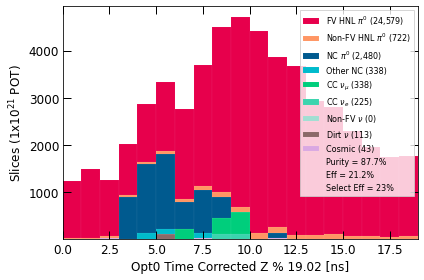

In [93]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]'
                    )

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postpi0mass.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Between Bucket Cut</h1>

In [94]:
def cutModt(df, score):
    when_modt = df["mod_t"] >= score
    df = df[when_modt]
    return df    

In [95]:
def vary_Modt(df_hnl, df_nu, df_cos):
    
    step = 0.2
    cutStep = np.arange(0, 19 + step, step)
    
    p_arr, eff_arr, peff_arr = [], [], []
    
    purity_start, eff_start = calc_purity_eff(df_hnl_shw1, df_nu_shw1, df_cos_shw1, true_counts, start_counts)
    
    for c in cutStep:
        df_hnl_cut = cutModt(df_hnl, score = c) 
        df_nu_cut = cutModt(df_nu, score = c) 
        df_cos_cut = cutModt(df_cos, score = c) 
        
        purity, eff = calc_purity_eff(df_hnl_cut, df_nu_cut, df_cos_cut, true_counts, start_counts)
        
        p_arr.append(purity)
        eff_arr.append(eff)
        peff_arr.append(purity*eff)
    
    pMax = max(p_arr)
    bestIndex = p_arr.index(pMax)
    
    del p_arr[bestIndex]
    del eff_arr[bestIndex]
    del peff_arr[bestIndex]
    cutStep = np.delete(cutStep, bestIndex)
    
    plot_purity_eff(p_arr, eff_arr, peff_arr, cutStep, purity_start, eff_start, loc = 'center right')

-------------------------------------
Best Cut Score PE =   0
Purity = 87.7352
Eff = 23.0446
Purity - Start Purity = -4.36197
Eff - Start Eff = 12.2524
-------------------------------------
Best Cut Score P = 16.8
Purity = 100
Eff = 1.61262
Purity - Start Purity = 7.90284
Eff - Start Eff = -9.17954


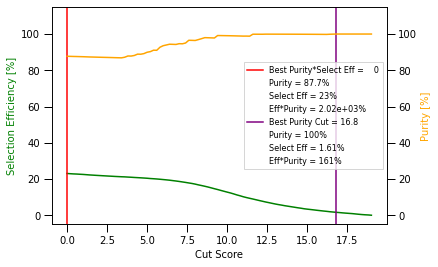

In [96]:
if ifTune:
    vary_Modt(df_hnl, df_nu, df_cos)
    if ifSave:
        plt.savefig(savePath+"/modt_tuning.png", dpi =200)

<h3>Apply Cut</h3>

In [97]:
df_hnl = cutModt(df_hnl, 10)
df_nu = cutModt(df_nu, 10)
df_cos = cutModt(df_cos, 10)

<h3>Save Purity/Eff</h3>

In [98]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Between Bucket")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.3708769941258626, 1.2192345003374452, 1.430075041871336, 1.59653705732805, 16.9918099546409, 52.673041366502225, 74.33145380937546, 77.9393360330066, 87.54876799096964, 87.73519299053896, 99.0840625586069]
[99.23830250272036, 85.76496191512516, 62.44396082698586, 58.38520130576714, 36.73558215451578, 29.886833514689886, 28.243743199129494, 27.551686615886833, 25.55386289445049, 23.044613710554955, 12.752992383025028]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Opt0 Score', 'Opt0 Fraction', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Shower Theta Cut', 'Pion Zero Mass', 'Between Bucket']


<Figure size 432x288 with 0 Axes>

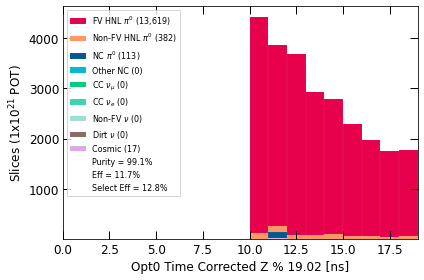

In [99]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]'
                    )

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_final.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Plot Purity/Efficiency </h1>

In [100]:
print(eff_arr)
print(purity_arr)
print(cut_arr)

[99.23830250272036, 85.76496191512516, 62.44396082698586, 58.38520130576714, 36.73558215451578, 29.886833514689886, 28.243743199129494, 27.551686615886833, 25.55386289445049, 23.044613710554955, 12.752992383025028]
[0.3708769941258626, 1.2192345003374452, 1.430075041871336, 1.59653705732805, 16.9918099546409, 52.673041366502225, 74.33145380937546, 77.9393360330066, 87.54876799096964, 87.73519299053896, 99.0840625586069]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Opt0 Score', 'Opt0 Fraction', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Shower Theta Cut', 'Pion Zero Mass', 'Between Bucket']


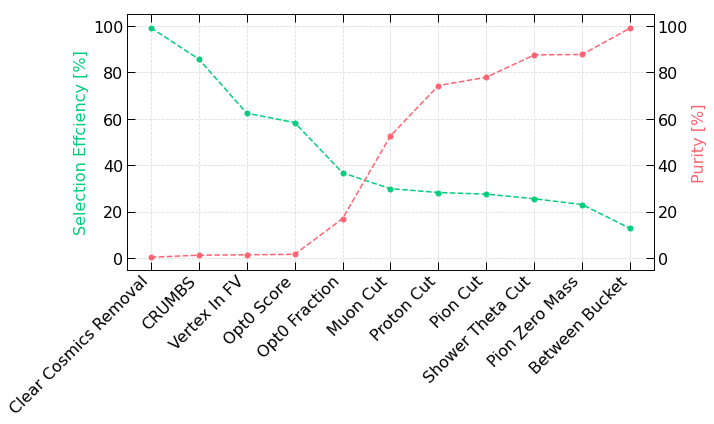

In [101]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6), sharex = True)
ax2 = ax1.twinx()

t = np.arange(0, len(cut_arr) , 1)

effcol = col_dict['MintGreen']
pcol = col_dict['Flamingo']

ax1.plot(t, eff_arr, c = effcol, marker = 'o', markersize = 5, ls='--')
ax2.plot(t, purity_arr, c = pcol, marker = 'o', markersize = 5, ls='--')

ax1.set_ylim(-5,105)
ax2.set_ylim(-5,105)

ax1.grid(color='gainsboro', which='both', axis='both', linestyle='--')

ax1.set_ylabel("Selection Effciency [%]", c = effcol, fontsize = 16)
ax2.set_ylabel("Purity [%]", c = pcol, fontsize = 16)

plt.xticks(range(0, len(t)))
ax1.set_xticklabels(cut_arr, rotation = 45, ha="right", fontsize = 16)

ax1.tick_params(bottom = True, top = True, left = True, right = False)
ax2.tick_params(bottom = True, top = True, left = False, right = True)

ax1.tick_params(axis = 'x', labelsize = 16, direction = 'in')
ax1.tick_params(axis = 'y', labelsize = 16, direction = 'in')
ax2.tick_params(axis = 'y', labelsize = 16, direction = 'in')

fig.tight_layout()

#-----------------------------------#
if ifSave:
    if ifStrict:
        plt.savefig(savePath+"peff_strict.png", dpi = 200)
    else:
        plt.savefig(savePath+"peff_relaxed.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Save Cut Dataframe to Pickle</h1>

In [102]:
df_hnl.to_pickle("./df_m200_v2_hnl.pkl", protocol = 5)

In [103]:
df_nu.to_pickle("./df_m200_v2_nu.pkl", protocol = 5)

In [104]:
df_cos.to_pickle("./df_m200_v2_cos.pkl", protocol = 5)